In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Plots LaTeX-Style
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [23]:
# Simulation Params
T = 6
h = 0.1
n = int(T/h)+1

# Noise Params
var = 0.02
std = np.sqrt(var)

# Dynamics
def dynamics_noisefree(x0, u):
    x = np.zeros((n,3))
    x[0] = x0
    for i in range(n-1):
        x[i+1,2] = x[i,2] + h*u[i,1]
        x[i+1,0] = x[i,0] + h*np.cos(x[i,2])*u[i,0]
        x[i+1,1] = x[i,1] + h*np.sin(x[i,2])*u[i,0]
    return x

# Initial Input
x0 = [0,0,np.pi/2]
u_init = np.zeros((n,2))
for i in range(n-1):
    u_init[i] = [1, -0.5]
x_real = dynamics_noisefree(x0, u_init)

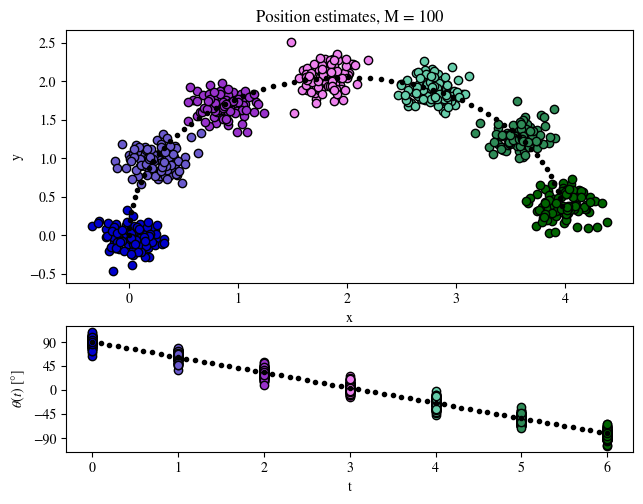

In [24]:
# Run Initial trajectory multiple times
# Plot position for [0, ..., 6] seconds, each second changing color

colors = ['mediumblue', 'slateblue', 'darkorchid', 'violet', 'mediumaquamarine', 'seagreen', 'darkgreen']

fig, axs = plt.subplots(2, 1, height_ratios=[2,1])
fig.tight_layout()

M = 100

for i in range(M):
    x_noise = np.zeros((n,3))
    for i in range(n):
        x_noise[i] = x_real[i] + np.random.normal(0,std,3)
    for s in range(7):
        axs[0].plot(x_noise[s*10,0], x_noise[s*10,1], marker="o", color=colors[s], mec='k')
        axs[1].plot(s, x_noise[s*10,2]*180/np.pi, marker="o", color=colors[s], mec='k')

for i in range(n): #Change to estimation from all samples with noise x_noise
    axs[0].plot(x_real[i,0], x_real[i,1], marker="o", color='k', markersize='3')
    axs[1].plot(i*h, x_real[i,2]*180/np.pi, marker="o", color='k', markersize='3')


axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_xlabel('t')
axs[1].set_ylabel(r'$\theta (t)$ [°]')
axs[1].set_yticks([-90, -45, 0, 45, 90])
axs[0].set_title('Position estimates, M = {}'.format(M))
plt.show()
